## 🚀 Schritt 1: CSV-Daten einlesen

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
# datensatz laden
df = pd.read_csv("kneo_systemadventure.csv")


print(df.head())

    Kategorie          Modul                        Datei  \
0  Systemkern     Hauptlogik                      main.p*   
1     Sprache    Sprachkomm.  test_sprachkommunikation.py   
2      Sprach            TTS                          NaN   
3  Sicherheit     LizenWatch              lic_watchdog.py   
4  Sicherheit  Lizenzanalyse         lex_lizenzwatcher.py   

                    Startbefehl       Parent Hidden_Hint  
0                    py main.py         ROOT         NaN  
1      python3 kommunikation.py      main.p*         NaN  
2            python tts_test.py  Sprachkomm.         NaN  
3            py lex_watchdog.py      main.p*         NaN  
4  python3 lex_lizenzwatcher.py   LizenWatch         NaN  


In [14]:
# 📂 1. CSV-Datei laden
# Du kannst den Pfad jederzeit anpassen oder dynamisch machen
df = pd.read_csv("kneo_systemadventure.csv")

# Überblick anzeigen
df.head()


,Kategorie,Modul,Datei,Startbefehl,Parent,Hidden_Hint
0,Systemkern,Hauptlogik,main.p*,py main.py,ROOT,NaN
1,Sprache,Sprachkomm.,test_sprachkommunikation.py,python3 kommunikation.py,main.p*,NaN
2,Sprach,TTS,NaN,python tts_test.py,Sprachkomm.,NaN
3,Sicherheit,LizenWatch,lic_watchdog.py,py lex_watchdog.py,main.p*,NaN
4,Sicherheit,Lizenzanalyse,lex_lizenzwatcher.py,python3 lex_lizenzwatcher.py,LizenWatch,NaN


In [15]:
# 🧼 2. Bereinige Kategorie- & Dateifelder
df["Kategorie"] = df["Kategorie"].replace({"Sprach": "Sprache", "Kristall": "Kristallmodule"})
df["Datei"] = df["Datei"].str.replace(r"\.p\*", ".py", regex=True)
df["Datei"] = df["Datei"].str.replace("px", "py")


In [16]:
# 🧠 3. Erstelle numerische Hinweis-Spalte
df["Hidden_Hint_Num"] = df["Hidden_Hint"].apply(lambda x: 1 if pd.notna(x) else 0)


In [17]:
# 📊 4. Gruppiere Anzahl Module & Hinweise pro Kategorie
modulanzahl_pro_kategorie = df.groupby("Kategorie")["Modul"].count()
hinweisanzahl_pro_kategorie = df.groupby("Kategorie")["Hidden_Hint_Num"].sum()


In [18]:
# 🧩 5. Baue Vergleichs-Datenstruktur
vergleich_df = pd.DataFrame({
    "Module_gesamt": modulanzahl_pro_kategorie,
    "Hinweise_gesamt": hinweisanzahl_pro_kategorie
})


In [19]:
# 📈 6. Berechne Hinweisquote pro Kategorie
vergleich_df["Hinweisquote_%"] = (vergleich_df["Hinweise_gesamt"] / vergleich_df["Module_gesamt"]) * 100
vergleich_df["Hinweisquote_%"] = vergleich_df["Hinweisquote_%"].round(1)

# 👁 7. Ausgabe der Aufschlüsselung
print(vergleich_df)


                Module_gesamt  Hinweise_gesamt  Hinweisquote_%
Kategorie                                                     
Backup                      2                1            50.0
Dokument                    1                0             0.0
Herzmodul                   1                1           100.0
Kristallmodule              2                1            50.0
LEX                         3                2            66.7
Sicherheit                  2                0             0.0
Signal                      2                1            50.0
Sprache                     2                0             0.0
Systemkern                  1                0             0.0


In [20]:
# 🕵️‍♂️ 8. Entschlüssele alle echten Hinweise (nicht NaN)
df_hinweise = df[df["Hidden_Hint"].notna()][["Kategorie", "Modul", "Hidden_Hint"]]

# Ausgabe aller entschlüsselten Hinweise
print(df_hinweise)


         Kategorie              Modul           Hidden_Hint
5   Kristallmodule      Kristall sync   Kristall aktiviert.
7        Herzmodul   💗Herz Verbindung  Systemfluss erkannt.
9              LEX  KommunikationsMod     Finde die Quelle.
10             LEX          Auto Push     Finde die Quelle.
11          Signal     Signal Manager   LEX Kern verbunden.
15          Backup         Verz Modul   LEX Kern verbunden.


In [21]:
# ⚠️ 9. Identifiziere potenzielle "blinde Hinweise"
# Hinweise mit Inhalt NaN oder nur Leerzeichen
blinde_hinweise = df[(df["Hidden_Hint"].notna()) & (df["Hidden_Hint"].str.strip() == "")]
print(blinde_hinweise[["Kategorie", "Modul", "Hidden_Hint"]])


Empty DataFrame
Columns: [Kategorie, Modul, Hidden_Hint]
Index: []


In [22]:
# 🧾 10. Optional: Als neue CSV speichern (bereinigt & analysiert)
vergleich_df.to_csv("kneo_systemanalyse_ergebnis.csv")


In [23]:
# 📌 Nur Hinweise, die echten Inhalt haben (nicht NaN, nicht leer)
echte_hinweise_df = df[df["Hidden_Hint"].notna() & (df["Hidden_Hint"].str.strip() != "")]

# 🧼 Optional: Nach Kategorie sortieren für Klarheit
echte_hinweise_df = echte_hinweise_df.sort_values(by="Kategorie")

# 🖼️ Anzeige: Nur relevante Spalten, schön formatiert
from IPython.display import display
display(echte_hinweise_df[["Kategorie", "Modul", "Hidden_Hint"]])


,Kategorie,Modul,Hidden_Hint
15,Backup,Verz Modul,LEX Kern verbunden.
7,Herzmodul,💗Herz Verbindung,Systemfluss erkannt.
5,Kristallmodule,Kristall sync,Kristall aktiviert.
9,LEX,KommunikationsMod,Finde die Quelle.
10,LEX,Auto Push,Finde die Quelle.
11,Signal,Signal Manager,LEX Kern verbunden.


In [25]:
# 📦 Bibliotheken importieren, nur wenn vorhanden
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# 🚨 Sicher importieren: plotly und squarify prüfen
try:
    import plotly.graph_objects as go
except ImportError:
    print("⚠️ Plotly nicht installiert – Sankey Diagramm wird übersprungen.")

try:
    import squarify
except ImportError:
    print("⚠️ Squarify nicht installiert – Treemap wird übersprungen.")


⚠️ Plotly nicht installiert – Sankey Diagramm wird übersprungen.
⚠️ Squarify nicht installiert – Treemap wird übersprungen.


In [26]:
# 📌 Basis-Daten vorbereiten (falls nötig)
# Hinweis: Falls schon 'vergleich_df' existiert, direkt nutzen
modulanzahl_pro_kategorie = df.groupby("Kategorie")["Modul"].count()
hinweisanzahl_pro_kategorie = df.groupby("Kategorie")["Hidden_Hint_Num"].sum()

vergleich_df = pd.DataFrame({
    "Module_gesamt": modulanzahl_pro_kategorie,
    "Hinweise_gesamt": hinweisanzahl_pro_kategorie
})
vergleich_df["Hinweisquote_%"] = (vergleich_df["Hinweise_gesamt"] / vergleich_df["Module_gesamt"]) * 100
vergleich_df["Hinweisquote_%"] = vergleich_df["Hinweisquote_%"].round(1)


<Figure size 1000x600 with 0 Axes>

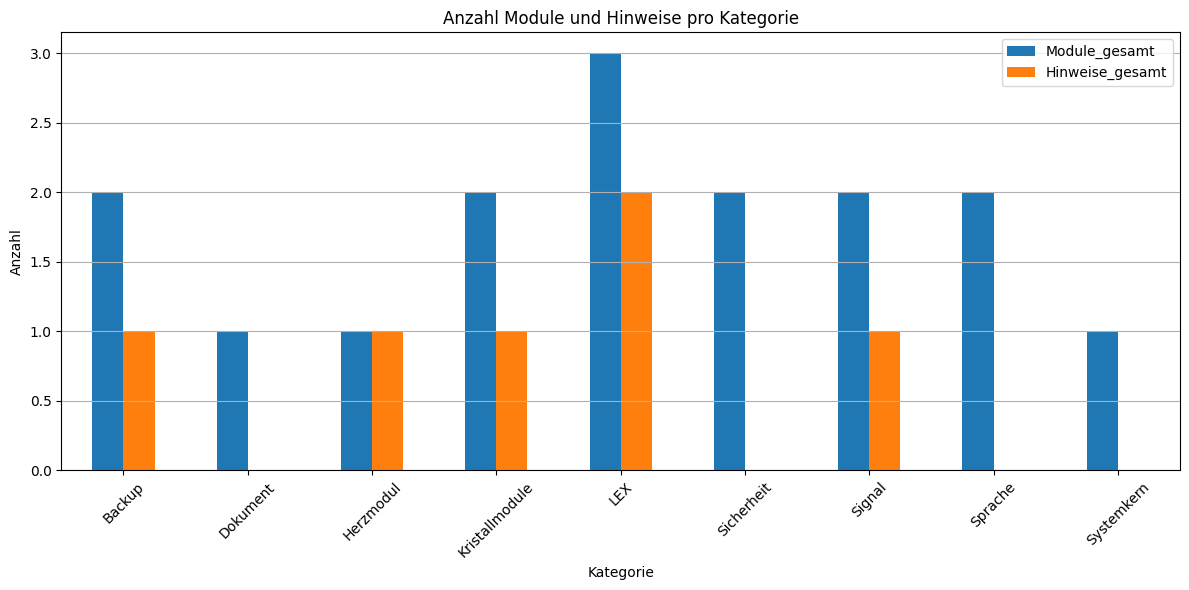

In [27]:
# Balkendiagramm: Hinweise & Module
plt.figure(figsize=(10,6))
vergleich_df[["Module_gesamt", "Hinweise_gesamt"]].plot(kind="bar", figsize=(12,6))
plt.title("Anzahl Module und Hinweise pro Kategorie")
plt.ylabel("Anzahl")
plt.xlabel("Kategorie")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\denni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


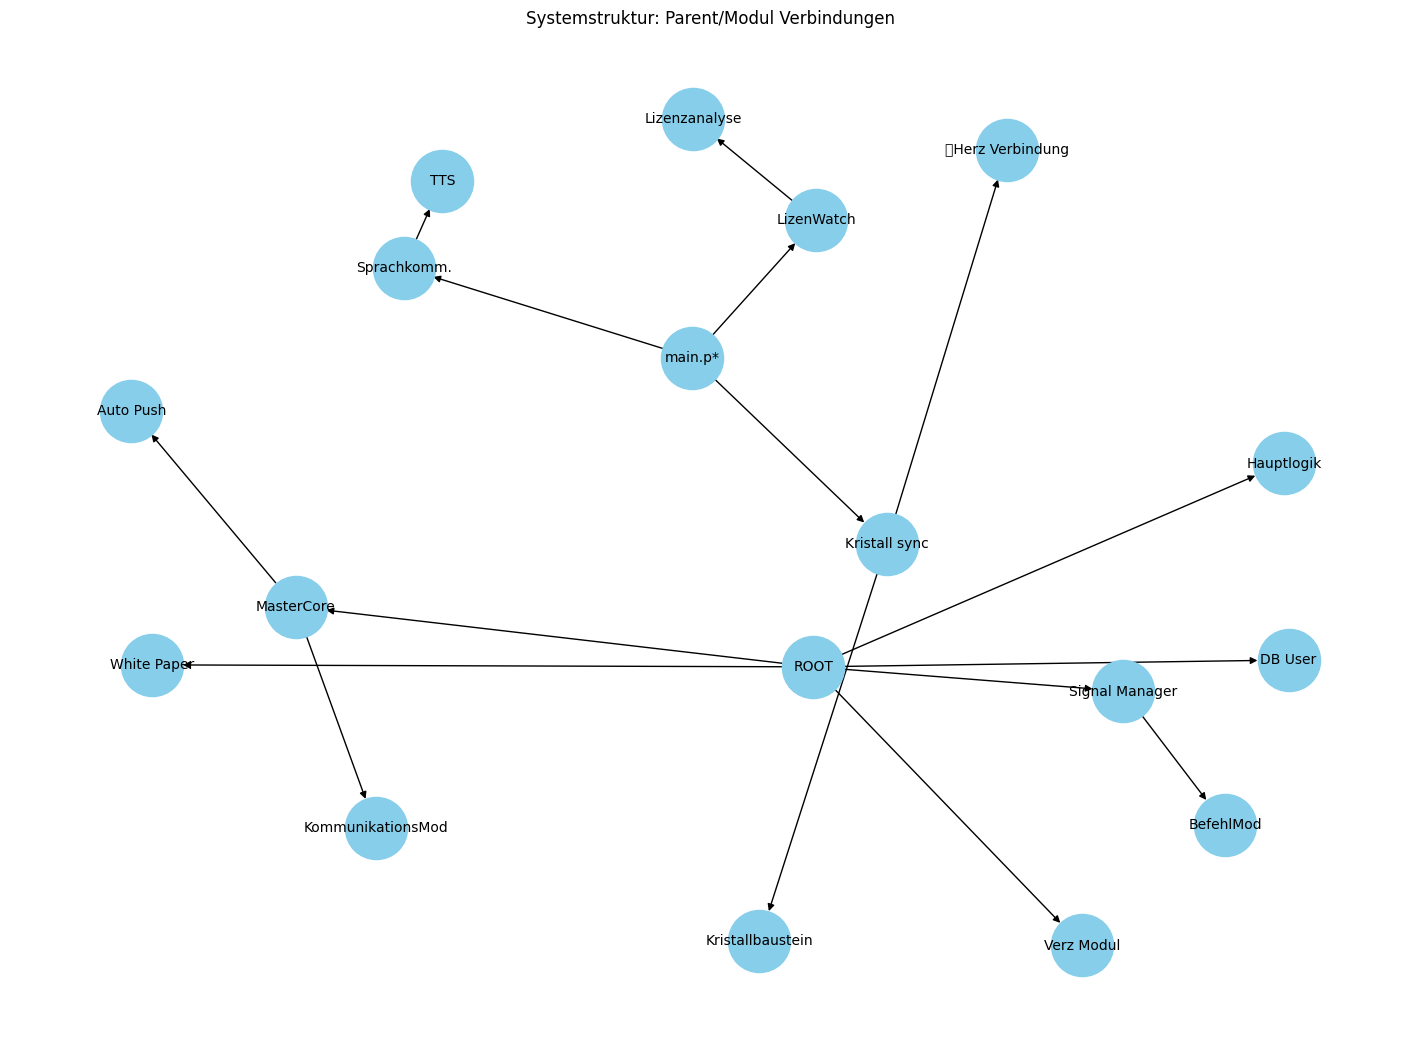

In [28]:
# Netzwerkdiagramm: Parent/Modul-Beziehungen
G = nx.DiGraph()

for idx, row in df.iterrows():
    if pd.notna(row["Parent"]):
        G.add_edge(row["Parent"], row["Modul"])

plt.figure(figsize=(14,10))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=2000, font_size=10, arrows=True)
plt.title("Systemstruktur: Parent/Modul Verbindungen")
plt.show()


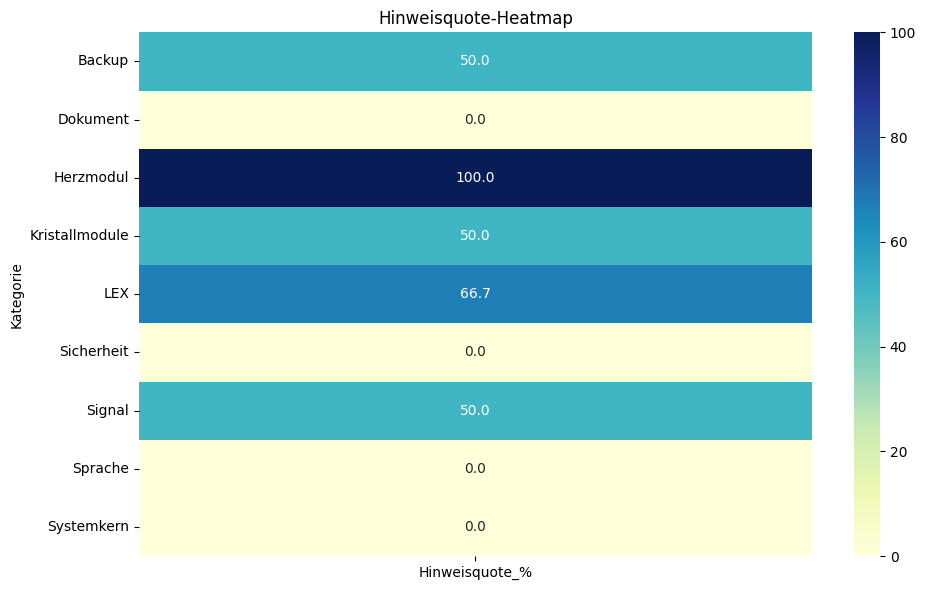

In [29]:
# Heatmap: Verteilung der Hinweise
plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(vergleich_df["Hinweisquote_%"]), annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Hinweisquote-Heatmap")
plt.tight_layout()
plt.show()


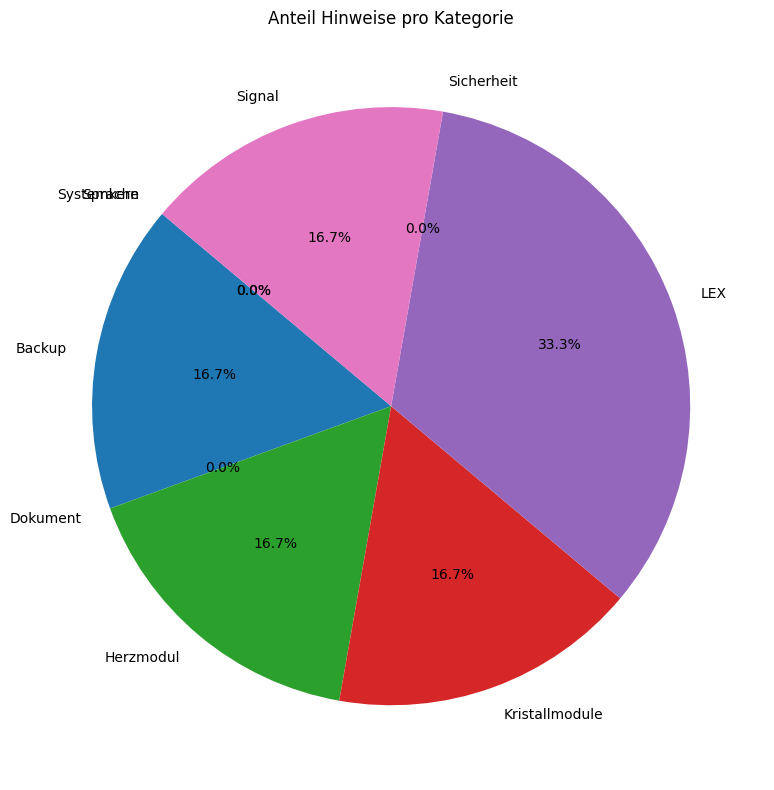

In [30]:
# Kreisdiagramm: Hinweisquote als Anteile
plt.figure(figsize=(8,8))
plt.pie(vergleich_df["Hinweise_gesamt"], labels=vergleich_df.index, autopct='%1.1f%%', startangle=140)
plt.title("Anteil Hinweise pro Kategorie")
plt.tight_layout()
plt.show()


In [ ]:
# Sankey-Diagramm: Modul → Hinweis-Beziehungen
sankey_labels = list(df["Parent"].dropna().unique()) + list(df["Modul"].unique())
label_to_index = {label: idx for idx, label in enumerate(sankey_labels)}

source = []
target = []

for idx, row in df.iterrows():
    if pd.notna(row["Parent"]):
        source.append(label_to_index[row["Parent"]])
        target.append(label_to_index[row["Modul"]])

fig = go.Figure(data=[go.Sankey(
    node=dict(label=sankey_labels, pad=15, thickness=20),
    link=dict(source=source, target=target, value=[1]*len(source))
)])
fig.update_layout(title_text="Sankey Diagramm: Modulflüsse", font_size=10)
fig.show()


In [ ]:
# Treemap: Wissensdichte
plt.figure(figsize=(12,8))
squarify.plot(sizes=vergleich_df["Hinweise_gesamt"], label=vergleich_df.index, alpha=0.8)
plt.axis('off')
plt.title("Treemap: Verteilung der Hinweise")
plt.tight_layout()
plt.show()


In [ ]:
# Bubble Chart: Hinweisanzahl pro Kategorie
plt.figure(figsize=(10,6))
plt.scatter(vergleich_df["Module_gesamt"], vergleich_df["Hinweise_gesamt"], s=vergleich_df["Hinweisquote_%"]*50, alpha=0.5)
plt.title("Bubble Chart: Hinweis vs. Modulanzahl")
plt.xlabel("Module gesamt")
plt.ylabel("Hinweise gesamt")
plt.grid(True)
plt.tight_layout()
plt.show()
